# Project: No_Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
>We have a dataset contains information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

#### Describtion of columns in the dataset:
- <b>PatientId:</b> unique indentifier for each patient.
- <b>AppointmentID:</b> unique indentifier for each Appointment.
- <b>Gender:</b> sex of each patient [F: Female | M: Male].
- <b>ScheduledDay:</b> tells us on what day the patient set up their appointment.
- <b>AppointmentDay:</b> the date to go to the hospital.
- <b>Age:</b> the date of birth of each patient.
- <b>Neighbourhood:</b> indicates the location of the hospital.
- <b>Scholarship:</b> indicates whether or not the patient is enrolled in Brasilian welfare program __[Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia#Benefit)__  [No: not enrolled | Yes: enrolled]
- <b>Hipertension:</b> indicates whether or not the patient has high blood pressure. [No | Yes]
- <b>Diabetes:</b> indicates whether or not the patient has Diabetes mellitus (is a chronic disease that impairs blood sugar regulation in the body) [No | Yes]
- <b>Alcoholism:</b> indicates whether or not the patient is an addiction to drinking alcohol [No | Yes]
- <b>Handicap:</b> indicates whether or not the patient has physical disability [No | Yes]
- <b>SMS_received:</b> indicates whether or not the patient received SMS message  [No | Yes]
- <b>No-show:</b> it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


#### From this dataset, we want to explore what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.
    
In order to do that, we need to examine whether there is a relationship between No show [being our independent variable] and other variables in the dataset. Below are the questions need to be answered:

* Is there a relationship between patient gender and no show ?
* Is there a relationship between patient age and no show ?
* Is there a relationship between patient enrollment in 'Bolsa Família' and no show ?
* Is there a relationship between patient medical condition [Hipertension, Diabetes, Alcoholism, Handicap] and no show ?
* Is there a relationship between receiving SMS and no show ?


In [1]:
# Lets import our needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the dataset, I have reduced the file name for easier handling
df = pd.read_csv('noshowappointments.csv')
# Lets check how our data looks like
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Lets explore number of samples, columns, data types, and any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Lets check whether we have duplicate data..
sum(df.duplicated())

0

In [5]:
# Lets check our unaique data
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# This to get some extra details
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<div class="alert alert-block alert-danger">
<b>Observatios:</b>
    
* We have 110,527 entries.
* 14 columns.
* Data types need some tweaks in date format.
* Columns [Hipertension] & [Handcap] need to be renamed for typo error.
* No missing values.
* No duplicate data.
* Handicap showing 5 unique values instead of 2.
* There is a negative value for age.
* 0 & 1 values are not clearly understandable

</div>

### Taking some steps to tweak the dataset

In [7]:
# Fixing the date format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
# Correcting wrong columns spelling
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

In [9]:
# Fixing Handicap values
df['Handicap'].unique() # This to identify the values

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
# the column 'Handcap' should include only 0 or 1, we will replace all incorrect values greater than 1 by the value of 1
df['Handicap'].replace(to_replace =[2,3,4], value =1,inplace=True)

In [11]:
# replacing all 0s by No and all 1s by Yes

# Step 1: Converting all int values in columns [Hypertension, Diabetes, Alcoholism, Handicap, SMS_received] into str

df['Scholarship'] = df['Scholarship'].astype(str)
df['Hypertension'] = df['Hypertension'].astype(str)
df['Diabetes'] = df['Diabetes'].astype(str)
df['Alcoholism'] = df['Alcoholism'].astype(str)
df['Handicap'] = df['Handicap'].astype(str)
df['SMS_received'] = df['SMS_received'].astype(str)

In [12]:
# Step 2: Replacing 0s & 1s

df['Scholarship'] = df['Scholarship'].replace({'0': 'No', '1': 'Yes'})
df['Hypertension'] = df['Hypertension'].replace({'0': 'No', '1': 'Yes'})
df['Diabetes'] = df['Diabetes'].replace({'0': 'No', '1': 'Yes'})
df['Alcoholism'] = df['Alcoholism'].replace({'0': 'No', '1': 'Yes'})
df['Handicap'] = df['Handicap'].replace({'0': 'No', '1': 'Yes'})
df['SMS_received'] = df['SMS_received'].replace({'0': 'No', '1': 'Yes'})

In [13]:
# Fixing negative age value
# Below to locate the negative value(s)
df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,No,No,No,No,No,No,No


In [14]:
# We will drop this row as it has an errant data
df.drop((df.index[99832]),inplace=True)
df.Age.min() # to confirm drop

0

<a id='eda'></a>
## Exploratory Data Analysis


In [15]:
# To make it easier, first we will segregate patients that showed up from those who didn't
no_show = df['No-show'] == 'Yes'
show = df['No-show'] == 'No'

In [16]:
# Now will create functions to speed up our analysis

# This function for plotting a histogram of a required column in relation to (no_show and show).
def histogram(column):
    df[column][no_show].hist(alpha=0.8, label='no show')
    df[column][show].hist(alpha=0.8, label='show')
    plt.legend();

In [17]:
# a function for showing the value counts of a required column and plotting the result.
def show_relation(column):
    print(df.groupby(column)['No-show'].value_counts())
    sns.displot(df, x="No-show", hue=column, multiple="stack")
    plt.title("No Show counts for {}".format(column), fontsize = 12)

### Is there a relationship between patient gender and no show ?

F    71839
M    38687
Name: Gender, dtype: int64


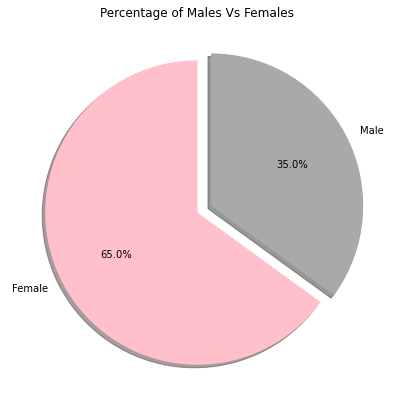

In [18]:
# First lets check the number of Males Vs Females in our dataset
print(df['Gender'].value_counts())

# Now lets show it in a pie shape
labels = ['Female','Male']
colors = ['pink', 'darkgray']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['Gender'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of Males Vs Females", fontsize = 12)
plt.show()

<div class="alert alert-block alert-info">
The dataset in hand is showing female patients number outweigh male patients
</div>

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64


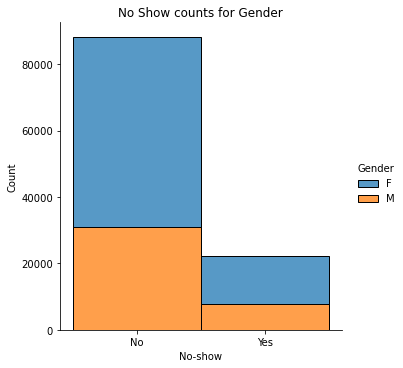

In [19]:
# Now lets explore the relationship between gender ans no show status
show_relation('Gender')

<div class="alert alert-block alert-info">
It is observed that majority of female patients have attened their appointments, the same is also observed in male patients
So, there is no specific relationship between gender and attending the appointment
</div>

### Is there a relationship between patient age and no show ?

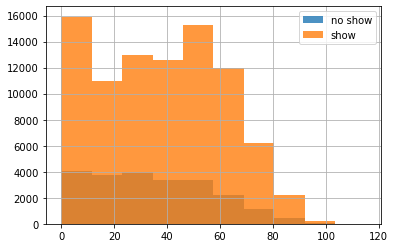

In [20]:
# Here will use the histogram function created earlier to show the distribution of age in relation to show & no show status
histogram('Age')

<div class="alert alert-block alert-info">
Above data indicates that at early age (like infants) they are more likely to show up for appointments which makes sense. This is also applicable to senior patients approaching their 60s.
</div>

### Is there a relationship between patient enrollment in 'Bolsa Família' and no show ?

No     99665
Yes    10861
Name: Scholarship, dtype: int64


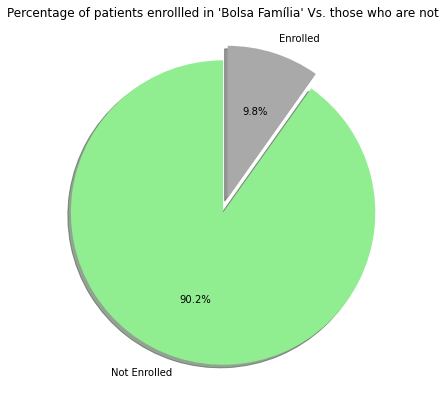

In [21]:
# Checking the number of patients enrollled Vs. not enrolled
print(df['Scholarship'].value_counts())

# Now lets show it in a pie shape
labels = ['Not Enrolled','Enrolled']
colors = ['lightgreen', 'darkgray']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['Scholarship'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of patients enrollled in 'Bolsa Família' Vs. those who are not", fontsize = 12)
plt.show()

<div class="alert alert-block alert-info">
Over 90% of patients are not enrolled ! interesting..
</div>

Scholarship  No-show
No           No         79924
             Yes        19741
Yes          No          8283
             Yes         2578
Name: No-show, dtype: int64


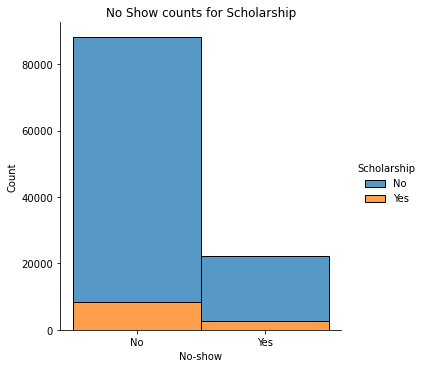

In [22]:
show_relation('Scholarship')

<div class="alert alert-block alert-info">
It seems that patients that are not enrolled in 'Bolsa Família' are more likely to show up for their appointments compared to other patients with enrollment
</div>

### Is there a relationship between patient medical condition [Hipertension, Diabetes, Alcoholism, Handicap] and no show ?

No     88725
Yes    21801
Name: Hypertension, dtype: int64


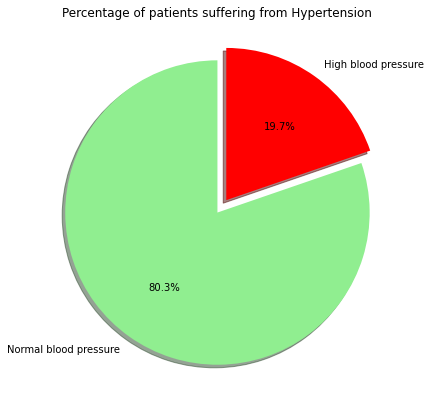

In [23]:
# Checking the number of patients suffering from Hypertension
print(df['Hypertension'].value_counts())

# Now lets show it in a pie shape
labels = ['Normal blood pressure','High blood pressure']
colors = ['lightgreen', 'red']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['Hypertension'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of patients suffering from Hypertension", fontsize = 12)
plt.show()

<div class="alert alert-block alert-info">
80% of patients are having normal blood pressure while over 19% of them having high blood pressure
</div>

Hypertension  No-show
No            No         70178
              Yes        18547
Yes           No         18029
              Yes         3772
Name: No-show, dtype: int64


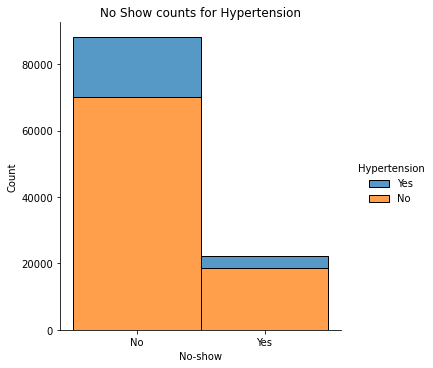

In [24]:
show_relation('Hypertension')

<div class="alert alert-block alert-info">
Majority of patients are not suffering from Hypertension and they are likely to show up. In the other hand, for patients suffering from Hypertension, they tend to show up as well.
</div>

No     102583
Yes      7943
Name: Diabetes, dtype: int64


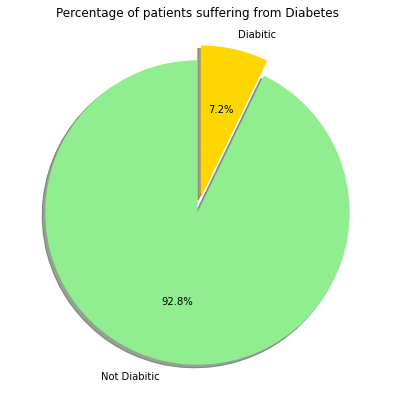

In [25]:
# Checking the number of patients suffering from Diabetes
print(df['Diabetes'].value_counts())
# df['Diabetes'].value_counts().plot(kind='pie');

# Now lets show it in a pie shape
labels = ['Not Diabitic','Diabitic']
colors = ['lightgreen', 'gold']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['Diabetes'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of patients suffering from Diabetes", fontsize = 12)
plt.show()

Diabetes  No-show
No        No         81694
          Yes        20889
Yes       No          6513
          Yes         1430
Name: No-show, dtype: int64


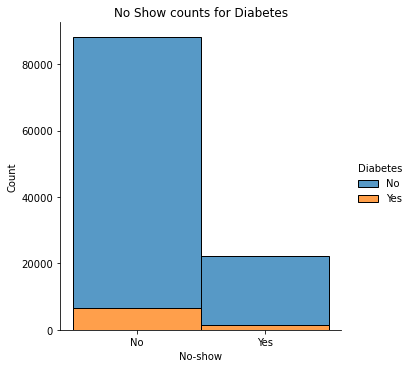

In [26]:
show_relation('Diabetes')

<div class="alert alert-block alert-info">
Majority of patients are not suffering from Diabetes and they are likely to show up. In the other hand, for patients suffering from Diabetes, they tend to show up as well.
</div>

No     107166
Yes      3360
Name: Alcoholism, dtype: int64


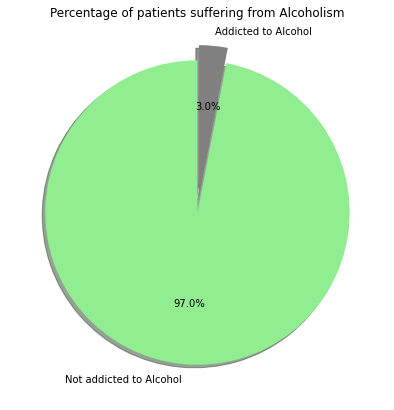

In [27]:
# Checking the number of patients suffering from Alcoholism
print(df['Alcoholism'].value_counts())

# Now lets show it in a pie shape
labels = ['Not addicted to Alcohol','Addicted to Alcohol']
colors = ['lightgreen', 'gray']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['Alcoholism'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of patients suffering from Alcoholism", fontsize = 12)
plt.show()

Alcoholism  No-show
No          No         85524
            Yes        21642
Yes         No          2683
            Yes          677
Name: No-show, dtype: int64


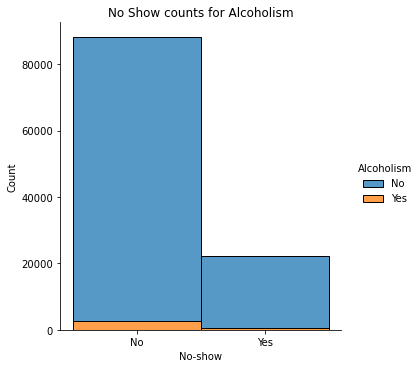

In [28]:
show_relation('Alcoholism')

<div class="alert alert-block alert-info">
Majority of patients are not suffering from Alcoholism and they are likely to show up. In the other hand, for patients suffering from Alcoholism, they tend to show up as well.
</div>

No     108285
Yes      2241
Name: Handicap, dtype: int64


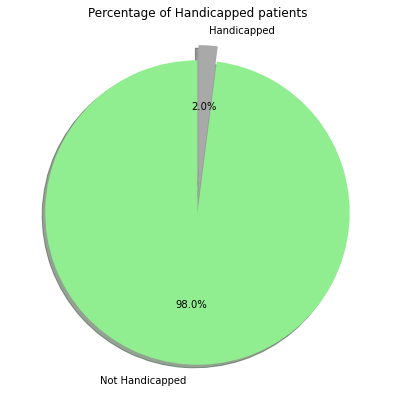

In [29]:
# Checking the number of handicaped patients
print(df['Handicap'].value_counts())

# Now lets show it in a pie shape
labels = ['Not Handicapped','Handicapped']
colors = ['lightgreen', 'darkgray']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['Handicap'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of Handicapped patients", fontsize = 12)
plt.show()

Handicap  No-show
No        No         86373
          Yes        21912
Yes       No          1834
          Yes          407
Name: No-show, dtype: int64


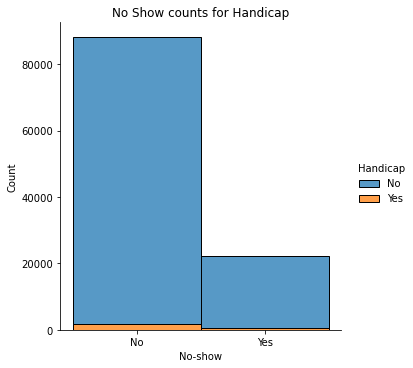

In [30]:
show_relation('Handicap')

<div class="alert alert-block alert-info">
Majority of patients are not handicaped and they are likely to show up. In the other hand, for handicaped patients, they tend to show up as well.
</div>

### Is there a relationship between receiving SMS and no show ?

No     75044
Yes    35482
Name: SMS_received, dtype: int64


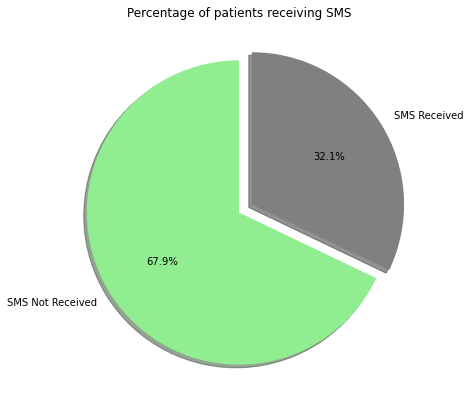

In [31]:
# Checking the number of patients under this category
print(df['SMS_received'].value_counts())

# Now lets show it in a pie shape
labels = ['SMS Not Received','SMS Received']
colors = ['lightgreen', 'gray']
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (13,7))
plt.pie(df['SMS_received'].value_counts(), labels= labels, explode = explode, colors=colors, startangle=90, autopct='%.1f%%',shadow = True)
plt.title("Percentage of patients receiving SMS", fontsize = 12)
plt.show()

SMS_received  No-show
No            No         62509
              Yes        12535
Yes           No         25698
              Yes         9784
Name: No-show, dtype: int64


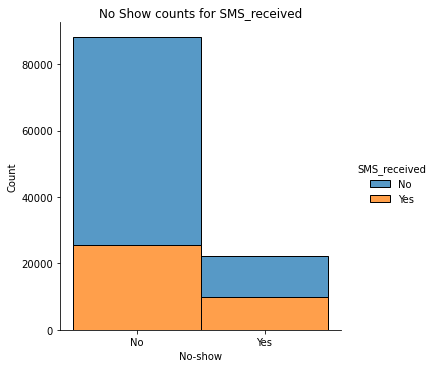

In [32]:
show_relation('SMS_received')

<div class="alert alert-block alert-info">
It seems that sending SMS doesn't have much affect as per the dataset in hand as majority of patients who did show up didn't get SMS.
</div>

<a id='conclusions'></a>
## Conclusions

<div class="alert alert-block alert-success">
-The dataset in hand is showing female patients number outweigh male patients.

-It is observed that majority of female patients have attended their appointments, the same is also observed in male patients So, there is no specific relationship between gender and attending the appointment.

-The data indicates that at early age (like infants) they are more likely to show up for appointments which makes sense. This is also applicable to senior patients approaching their 60s. While mid-age patients tend to miss their appointments.
    
-It seems that patients that are not enrolled in 'Bolsa Família' are more likely to show up for their appointments compared to other patients with enrollment.
    
-By checking patient medical condition [Hipertension, Diabetes, Alcoholism, and Handicap], it is observed that regardless the patient condition, the majority tend to show up for the appointments. 
    
-Sending SMS doesn't have much affect as majority of patients who did show up didn't get SMS. Taking into consideration that majority of patients are newborn/infants that can not use this facility.

</div>

## Limitation

<div class="alert alert-block alert-warning">

Since the data revealed that most patients are not enrolled in the 'Bolsa Família' program, it will be helpful if the patients income level to be included for futher investigation.
</div>